<div class="row">
    <div class="column">
        <img src="https://datasciencecampus.ons.gov.uk/wp-content/uploads/sites/10/2017/03/data-science-campus-logo-new.svg"
             alt="Data Science Campus Logo"
             align="right" 
             width = "340"
             style="margin: 0px 60px"
             />
    </div>
    <div class="column">
        <img src="https://cdn.ons.gov.uk/assets/images/ons-logo/v2/ons-logo.svg"
             alt="ONS Logo"
             align="left" 
             width = "420"
             style="margin: 0px 30px"/>
    </div>


---

<center><h1><font size=6> Statistics for Data Science with Python </font></h1></center>
<center><h1><font size=7> Introduction </font></h1></center>

*By Dr. Laurie Baker and Dr. Daniel J. Lewis*


# Introduction

Learners will at this point be familiar with how to bring their data into Python and how to clean it.

    
<img src="../../images/tidydata_5.jpg"  width="800" height="800" alt="Analysis process: Wrangle, Visualise, Model.">
Image Credit: @AlisonHorst



<img src="../../images/serra_rio.jpg"  width="800" height="800" alt="The modelling process is like a road map. There are a series of stages.">
Image Credit: Serra Rio do Rastro. Source: Rosanetur


This course covers the next steps of exploring and analysing the results and is intended to give a road map of the modelling process: 


2. **Explore the data.** Explore the variation and covariation in the data. Identify patterns through plotting which can be explored further using formal statistical testing. 

3. **Choose the model:** choose the mathematical description of the pattern you are trying to describe. 

4. **Fit parameters:** once you have defined your model, you can estimate the parameters (slope, intercept, ...). The parameters are effectively the answers to your questions from **1**. 

5. **Estimate confidence intervals/test hypotheses/select models:** measurements of uncertainty are necessary to contextualise your best-fit parameters. By quantifying the uncertainty in the fit of a model, you can estimate confidence limits for the parameters. You can then test your hypothesis statistially and practically, can we tell the difference statistically between the effect of bed nets to control malaria? Are these differences large enough to make bed nets an effective intervention strategy?

Adapted from [*Ecological Models and Data with R*](https://ms.mcmaster.ca/~bolker/emdbook/book.pdf) by Ben Bolker. 




## Course Description: 

This course introduces the basics of carrying out a statistical analysis in Python. It covers exploratory data analysis and constructing and interpreting linear and generalized linear models. 

## **Aims, Objectives and Intended Learning Outcomes:** 

<br>

### Chapter 1: Exploratory Data Analysis
By the end of Chapter 1, learners should know:

*   What is tidy data?
    *   What is a variable, value, and observation?
    *   Several python commands to explore the structure of the data
    *   What is the difference between a continuous and categorical variable?
    *   What is variation and covariation?
*  Where Exploratory Data Analysis fits within data analysis?
    *   How to use plots to explore variation in 
        *	A continuous variable
        *	A categorical variable
    *   How to use plots to explore covariation between
        *	Two categorical variables
        *	Two continuous variables
        *	A categorical and continuous variable. 

### Chapter 2: Model Basics

By the end of Chapter 2, learners should know:

*   Model Basics
    *	 What is a model family and fitted model?
    *	 What is the difference between a response and an explanatory variable?
    
*   Model Construction
    *  How to construct a linear model in python?
    *  What are the slope and intercept in a linear model?
    *  Picking out key information from the model table
    *  How to extract specific parameters from the model object.

*  Assessing Model Fit
    *	 How to inspect model residuals to assess model fit?
    *	 How to pick out key information from the table from a fitted model. 
    *  How to use Adjusted R-squared and AIC to compare models. 

### Chapter 3: Generalized Linear Models

By the end of Chapter 3, learners should know

* What is probability? 

* What is a random variable?

* What a probability distribution is and how it differs for continuous vs. discrete random variables?
* Be familiar with several common probability distributions used to model variation in the response variable
  * Binomial
  * Normal
  * Poisson
  * Negative Binomial

* How to implement a generalized linear model in python.


**Acknowledgements:** Many thanks to Dr. Paraskevi Pericleous for key initial work on this module. Many thanks to Dr. Daniel J. Lewis for preparing the GLM material. 


### Packages for this adventure

In [1]:
import numpy as np # linear algebra
import pandas as pd # tabular data processing
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualisation and plotting

# Set a style
plt.style.use('ggplot')

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# supress warnings due to different versions of packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# set plots to show inline
%matplotlib inline

---
# Chapter 1: Exploratory Data Analysis


## Introduction

Exploratory data analysis is a fluid process and there is no single approach. It can be thought of a process of hypothesis generation, data exploration, and formal statistical testing. It comes after the stage of importing and tidying your data.


In this section we will walk through organising your data, getting to know your data structure, and understanding variation and covariation within and between variables.  


For these exercises we will use a simulated dataset of departmental salaries, which consists of the salaries of professors in 5 departments: english, informatics, statistics, biology, and sociology.



### Tidying your data

To conduct regression analyses in python it is important to have your data in a format that is easy to work with. A good approach is to organise your data in a "tidy" format. 

Tidy data is a set of values, where each `value` is placed in its own “cell”, each `variable` in its own column, and each `observation` in its own row. Although this course is on Statistics in Python, the book [*R for Data Science*](https://r4ds.had.co.nz/) by Garrett Grolemund and Hadley Wickham is a great resource when thinking about tidying data. Here, we use some of the definitions they set out in the book to describe tidy data. 

**Some definitions for tidy data**:

 * A `variable` is a quantity, quality, or property that you can measure.

 * A `value` is the state of a variable when you measure it. The value of a variable may change from measurement to measurement.

 * An `observation` is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object). An observation will contain several values, each associated with a different variable.

  * In python, the *pandas* package makes it easy to format your data in a tabular format. 
  

**Reading in the data**

In [2]:
# read in the salary data
salaries = pd.read_csv("../../data/faculty-data.csv") 

In [4]:
# looking at the head of the dataframe
salaries

,ids,department,bases,experience,raises,salary
0,1,sociology,39012.062997,3,2122.325646,45379.039935
1,2,biology,51872.123941,9,541.643975,56746.919719
2,3,english,64341.126468,3,543.178641,65970.662390
3,4,informatics,68975.266754,2,1736.946839,72449.160433
4,5,statistics,78262.278702,9,469.943148,82491.767032
...,...,...,...,...,...,...
95,96,sociology,42107.716434,8,1957.880086,57770.757125
96,97,biology,49774.735037,5,470.338273,52126.426402
97,98,english,60919.523254,3,502.197549,62426.115902
98,99,informatics,63809.889673,7,1641.660044,75301.509985


**Exercise**

Our salary data consists of the salaries of individual professors from 5 departments within the University: english, informatics, statistics, biology, and sociology. The data contains the following variables

* `ids` = individual id
* `department` = university department
* `bases` = the starting salary
* `experience` = years of experience
* `raises` = raise per year
* `salary` = current salary

We're interested in exploring the relationship between years of experience and salary, but first we need to get to know our data a bit better. 

1. Looking at the definitions for `value`, `observation`, and `variable`, give an example of each term from the salary data.



## Getting to know your data

To get started, let's explore the following questions for our dataset. 

 1. What is the structure of the data?

 2. What type of variation occurs within my variables?

 3. What type of covariation occurs between my variables? 
 

### Data Structure and Data Summaries

One of the things we will wish to know about our variables are whether they are continuous or categorical. 

<img src="../../images/continuous_discrete.png"  width="700" height="700" alt="Continuous values include weight and height. Categorical variables are discrete things, like the number of octopus legs.">
Image Credit:  @AllisonHorst.


   * `Continuous variable`: a variable that can take on an unlimited number of values between the lowest and highest points of measurements.
        * e.g. speed, distance, height
        
        
  * `Categorical variable` can take **one** of a limited subset of values. For example, if you have a dataset about a household then you will typically find variables like employment sector, marriage status, and country.
      * In python, categorical variables are usually stored as character strings or integers (e.g. 'Industry' and 'Academia' for types of employment sector). 
      * Categorical variables are **nominal** if they have no order (e.g. 'Ghana' and 'Uruguay')
      * Categorical variables are **ordinal** if there is an order associated with them (e.g. 'low', 'medium', and 'high' referring to economic status).

As we start to think about our data and the types of variables we are working with, we recommend reading [Chapter 4: "What Gets Counted Counts"](https://data-feminism.mitpress.mit.edu/pub/h1w0nbqp/release/2) of Data Feminism by Catherine D'Ignazio and Lauren Klein. The book encourages us to rethink binaries and examine classification systems in data science.


**Exercises** 

Run the following lines of code to answer the questions below

1. What are the dimensions of the dataframe?


In [5]:
# the shape attribute returns the dimensions of the dataframe
salaries.shape

(100, 6)

2. What are the first and last values of salary?


In [6]:
# the head method shows us the first 5 rows

salaries.head()

,ids,department,bases,experience,raises,salary
0,1,sociology,39012.062997,3,2122.325646,45379.039935
1,2,biology,51872.123941,9,541.643975,56746.919719
2,3,english,64341.126468,3,543.178641,65970.662390
3,4,informatics,68975.266754,2,1736.946839,72449.160433
4,5,statistics,78262.278702,9,469.943148,82491.767032


In [7]:
# the tail method shows us the last 5 rows

salaries.tail()

,ids,department,bases,experience,raises,salary
95,96,sociology,42107.716434,8,1957.880086,57770.757125
96,97,biology,49774.735037,5,470.338273,52126.426402
97,98,english,60919.523254,3,502.197549,62426.115902
98,99,informatics,63809.889673,7,1641.660044,75301.509985
99,100,statistics,84420.476008,3,537.931883,86034.271658


3. Which variables are categorical or continuous variables? What are these data types called in Python?

In [8]:
# the info method will tell us about our data frame, including how many observations per column and the type of data.

salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ids         100 non-null    int64  
 1   department  100 non-null    object 
 2   bases       100 non-null    float64
 3   experience  100 non-null    int64  
 4   raises      100 non-null    float64
 5   salary      100 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.8+ KB


We often see type: `object` in `pandas`, [this section of the package user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) explains why this is.

 4. Using the data summary, what is the minimum and maximum salary?

In [9]:
# the describe method gives us a summary of the numerical data and the spread of values

salaries.describe()

,ids,bases,experience,raises,salary
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,60226.029444,4.820000,1033.461045,65448.393841
std,29.011492,14240.030985,2.889829,671.385251,13219.178125
min,1.000000,37246.936522,0.000000,450.600025,42827.156913
25%,25.750000,48071.305546,3.000000,481.551932,54745.711028
50%,50.500000,59431.965403,5.000000,540.378028,62375.126164
75%,75.250000,72671.300340,7.250000,1741.022583,78631.780911
max,100.000000,87009.876061,9.000000,2177.423176,91342.489460


5. What are the names of the columns?

In [10]:
# the columns attribute returns the column names

salaries.columns

Index(['ids', 'department', 'bases', 'experience', 'raises', 'salary'], dtype='object')

6. Do we have any missing data? How many missing values do we have per variable?

In [11]:
# the isna() method returns missing values and the sum() method adds them up.

salaries.isna().sum()


ids           0
department    0
bases         0
experience    0
raises        0
salary        0
dtype: int64

We can only find missing values when we have told the dataframe what to count as missing data. Sometimes our data may contain unrecognised or other custom values that signify missing values. If this happens we need to overwrite these values as missing values.

7. What are the unique departments in our dataset?

In [12]:
# the unique() method returns the distinct values in a column.

salaries['department'].unique()

array(['sociology', 'biology', 'english', 'informatics', 'statistics'],
      dtype=object)

8. Do we have any duplicates in our data?

In [13]:
# the duplicated() method returns duplicates, the sum() method adds them up for us.

salaries.duplicated().sum()

0

Note that if we wanted to filter out duplicates we can use `.drop_duplicates()`. Although, in this dataset we don't have duplicates.

In [14]:
# you can filter out the duplicates using the drop_duplicates method.

salaries.drop_duplicates()

,ids,department,bases,experience,raises,salary
0,1,sociology,39012.062997,3,2122.325646,45379.039935
1,2,biology,51872.123941,9,541.643975,56746.919719
2,3,english,64341.126468,3,543.178641,65970.662390
3,4,informatics,68975.266754,2,1736.946839,72449.160433
4,5,statistics,78262.278702,9,469.943148,82491.767032
...,...,...,...,...,...,...
95,96,sociology,42107.716434,8,1957.880086,57770.757125
96,97,biology,49774.735037,5,470.338273,52126.426402
97,98,english,60919.523254,3,502.197549,62426.115902
98,99,informatics,63809.889673,7,1641.660044,75301.509985


### Variation

Now we know more about the structure of our data we can explore the variation and covariation in the variables. Knowing the variation and covariation between variables can help us to understand the spread of the data and potential relationships in the data that may give insight into modelling. 


<div class="alert alert-block alert-success">
<b><font size="4"> Terminology</font> </b> 
<p> 

  * `variation`: is the tendency of values of a variable to change from measurement to measurement. Variation can come in several forms: 
    - `measurement error`: you may measure the same thing twice and get slightly different values.
    - `natural variation`: is the term I use to refer to variation that is inherent in a population or sample (e.g. as humans we all have different heights, the way these values vary reflect the variation in the sample or population).

  * `covariation`: tendency of values of a variable to change with the values of another variable. 

</p>
</div>


Visualisation is a great initial tool to explore these relationships further.

### Visualising Distributions

How you visualise your variables depends on if the variable is `categorical` or `continuous`.


**A categorical variable** 

   * `Categorical or discrete variable`: a variable that can take on one of a limited, usually fixed number of possible values, assigning each value to a particular group or nominal category. 
        * e.g. employment sector, economic status, density: (high, medium, low)
        
To examine the distribution of a categorical variable, we can use a bar plot:

  * Bar plots are a useful tool for getting to know how many observations are within each group of a category. 

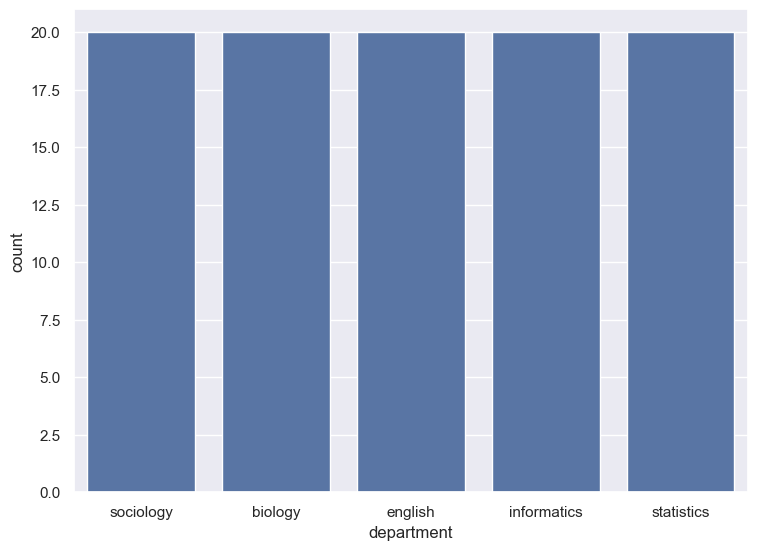

In [15]:
# We can use the countplot method to create a bar chart.
# We need to specify the variable to plot, department, and the data: salaries.

department_counts = sns.countplot(x="department",
                                  data=salaries)
department_counts;

In this case, the bar chart shows that there are the same number of individuals who we have salary data for per department in the data set.
**A continuous variable**
  * A `continuous variable` can take any of an infinite set of ordered values (e.g. numbers and date times). We can inspect the spread of the data using a density plot or box plot. 

C:\Users\joyces\AppData\Local\Temp\ipykernel_14456\3695421610.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  salary_all_distplot = sns.distplot(salaries['salary'],


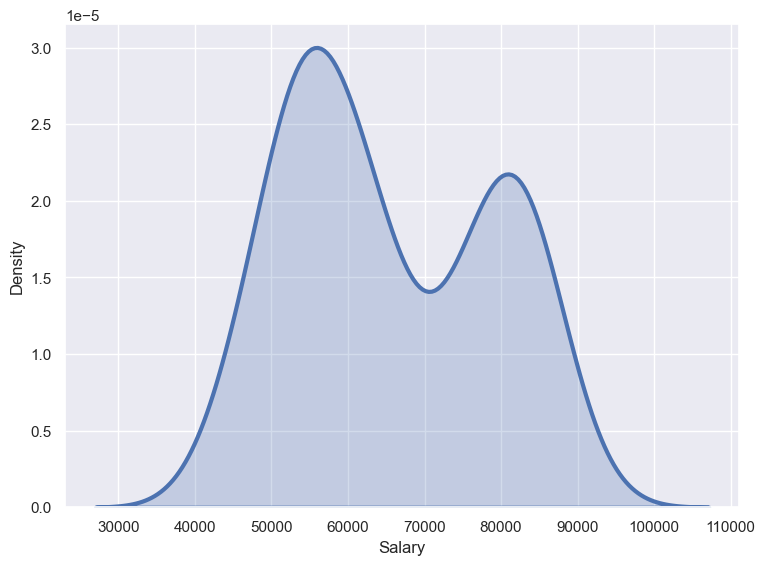

In [22]:
# We can use the distplot method to make a plot of the distribution.
# We again specify the variable to plot, salary.
# We can customise the plot using several parameters
# to include a histogram or not, e.g. hist=False
# to plot a Gaussian kernel density e.g. kde=True
# to customise the appearance of the plot, kde_kws,
# including keyword arguments for underlying plotting functions like shade.

salary_all_distplot = sns.distplot(salaries['salary'],
                                   hist=False,
                                   kde=True,
                                   kde_kws={'shade': True,
                                            'linewidth': 3})

# We can then set the xlabel and ylabel for the plot using the method set()

salary_all_distplot.set(xlabel='Salary',
                        ylabel='Density');

If we look at the distribution of salary, something interesting seems to be happening. It appears that the distribution is *bimodal* meaning that there are two modes, in this case two maxima (around 55,000 USD and 80,000 USD), in the data.

Let's explore the data in more detail by plotting the salary by department

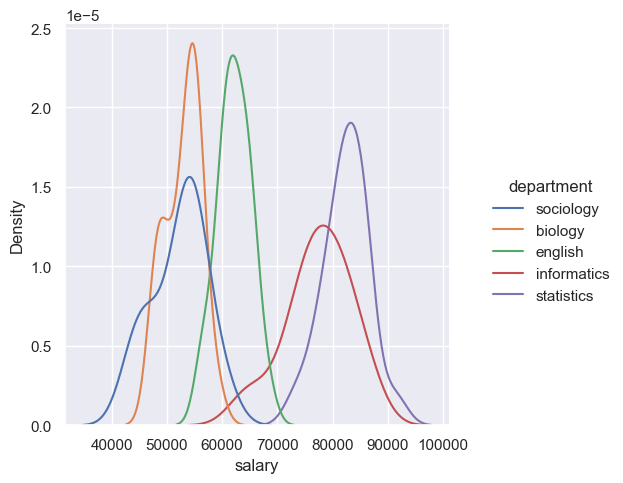

In [23]:
# We can explore the distribution of salaries broken down by department
# Each of the distributions are slightly different shaped
# There are clear groupings between different departments

sns.displot(data=salaries, x='salary', hue='department', kind='kde')


### Covariation


**A continuous and categorical variable**

 * **Box plot of salary by department**


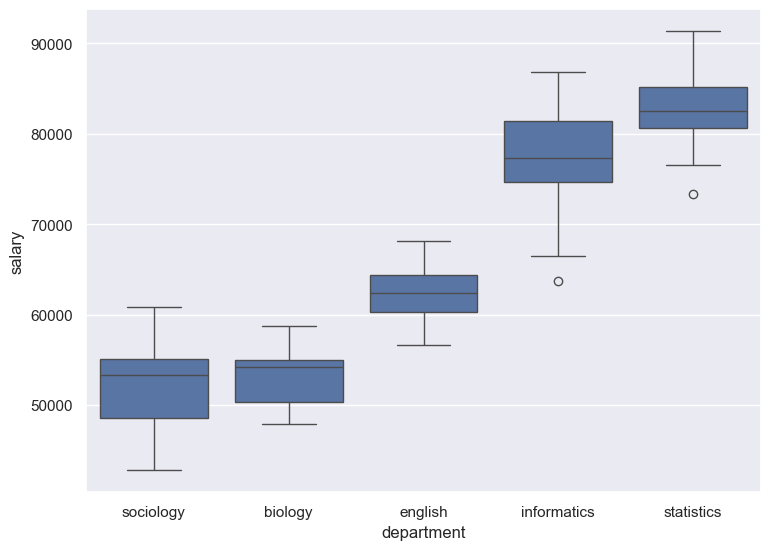

In [24]:
# Using the boxplot function to create a boxplot. 
# To create this plot we need to specify the y variable (continuous)
# and the x variable (categorical)

salary_boxplot = sns.boxplot(data=salaries, 
                             y='salary', 
                             x='department');

* A box plot gives us a visual representation of the distribution of numeric data using quartiles. It can be a good way to see how the data is spread and to identify potential outliers. 
    * The box plot shows the median (second quartile) in the middle of the plot.
    * The first and third quartile represent the interquartile range (25\% to 75\%). 
    * The minimum and maximum are defined as the (Q1 - 1.5 x IQ) and (Q3 + 1.5 x IQ).

* **Violin plots of salary for each department**


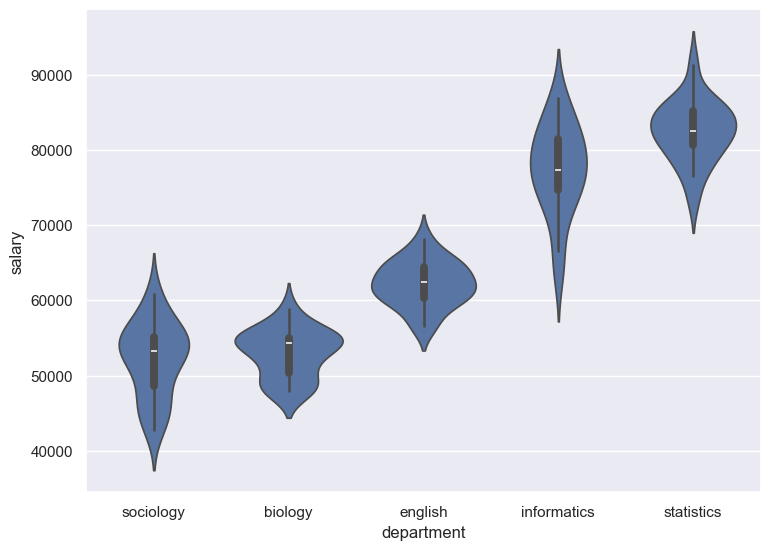

In [25]:
# Using the violinplot function to create a violin plot.
# To create this plot we need to specify the y variable (continuous)
# and the x variable (categorical)

salary_violin = sns.violinplot(data=salaries,
                               y="salary",
                               x='department');

Violin plots are similar to box plots, but they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. 

**Two continuous variables**

Plotting two continuous variables, we can see how they change in relation to eachother. In these plots we are looking to see whether there is a 

* **positive relationship** as one variable increases the other variable increases

* **negative relationship** as one variable increases the other decreases

* **no relationship** no discernable pattern of change in one variable with the other.

* **non-linear relationship** we may also be able to pick out other patterns, e.g. *polynomials*. 


Spot the third variable? Is it categorical or continuous?


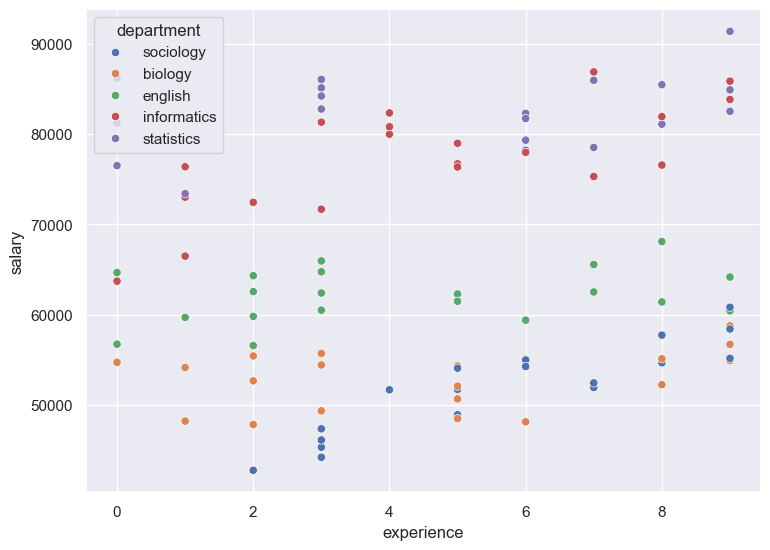

In [26]:
# Using the scatterplot function to create a scatterplot. 
# To create this plot we need to specify the x and y variable (both continuous).
# Which variable we put on which axis depends on the relationship we are exploring.
# Typically this is how does y change with x. The relationship is often causal  
# In this case, how does the salary vary with experience? 
# It is reasonable to think that someone's salary increases with experience
# rather than someone's experience increasing with salary.
# We can also specify the colour using hue.

salary_experience = sns.scatterplot(data=salaries, 
                                    x='experience', 
                                    y='salary', 
                                    hue='department');


<div class="alert alert-block alert-info">
<b><font size="4">Exercise:</font></b> 

<p> 

1. Make a box plot or a violin plot of experience by department.

</p> </div>


<Axes: xlabel='experience', ylabel='salary'>

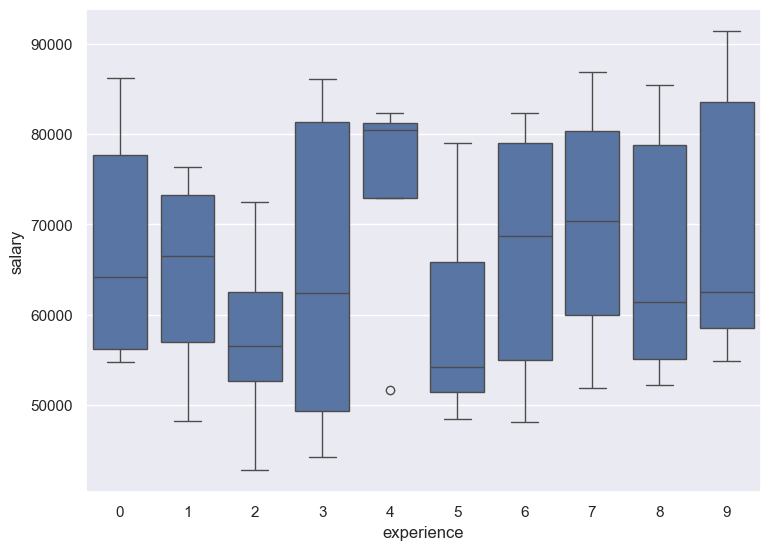

In [29]:
# Boxplot

sns.boxplot(data=salaries,
            x="experience",
            y="salary")

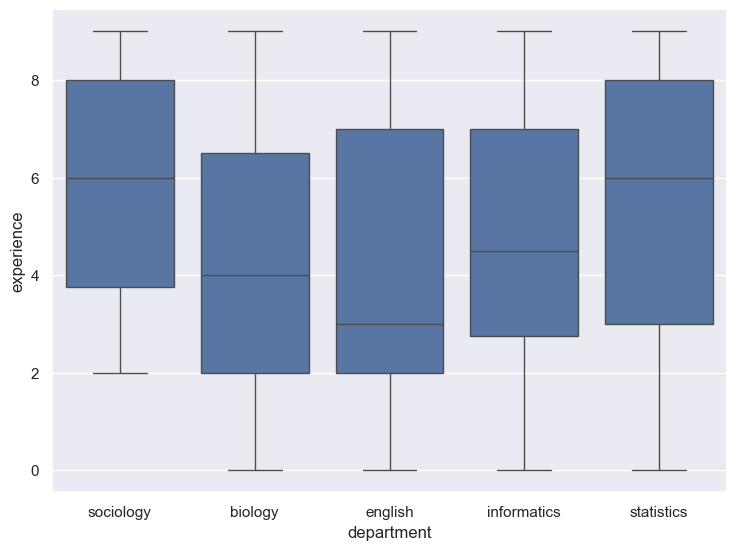

In [30]:
# %load "./Solutions/ex1.1.py"
sns.boxplot(data=salaries,
            x="department",
            y="experience");


<div class="alert alert-block alert-info">

<p> 
2. Make a scatterplot to visualise the relationship between base salary `bases` and raises `raises` coloured by department. What patterns can you pick out from the data?

</p> </div>


<Axes: xlabel='bases', ylabel='raises'>

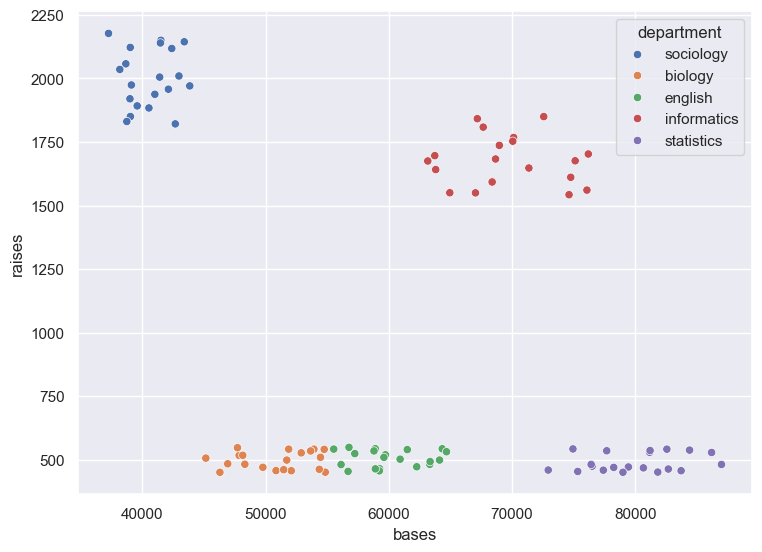

In [31]:
# Scatterplot

sns.scatterplot(data=salaries,
                x="bases",
                y="raises",
                hue="department")

In [ ]:
# %load "./Solutions/ex1.2.py"
sns.scatterplot(data=salaries,
                x="bases",
                y="raises",
                hue="department");

<div class="alert alert-block alert-info">

<p> 
3. Pairplots can be a quick and useful way to summarise your dataset quickly and to inspect the relationships simultaneously.Trying running the following code to make a pairplot. What does this code do? 
    
4. Using SHIFT + TAB to look at the documentation, what other options can you choose for the 
diagonal plot (diag_kind)?

</p> </div>

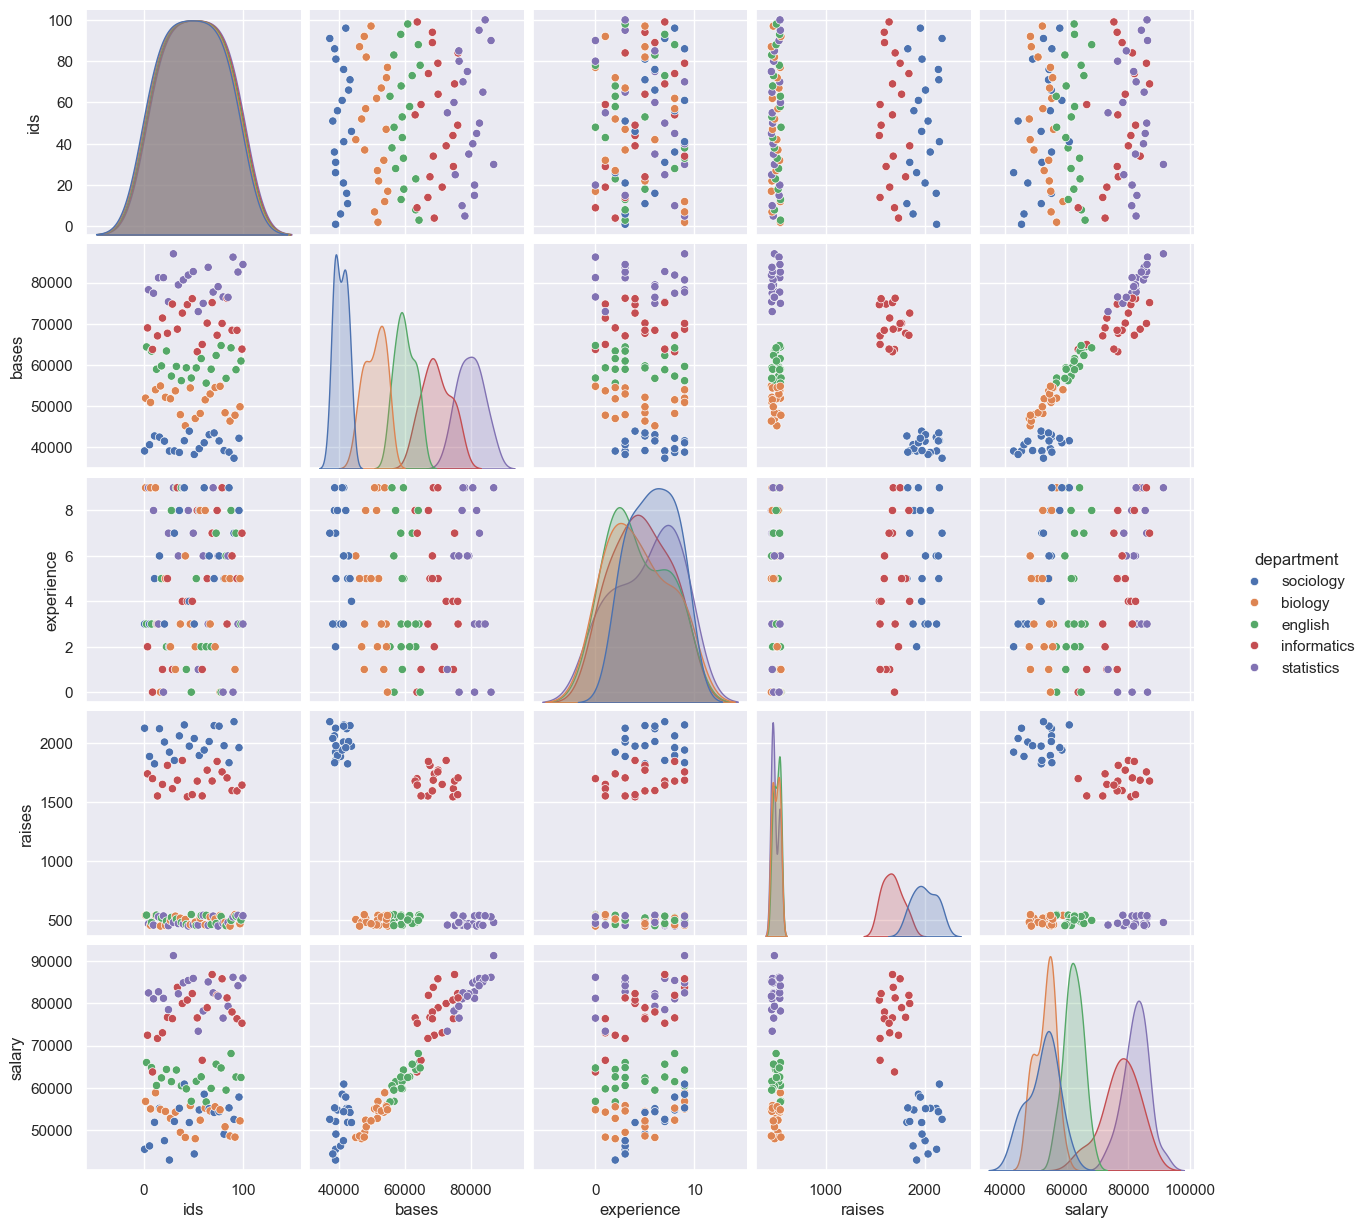

In [32]:
# Using the method pairplot we can explore all variables in our data set.
# We need to specify the data, and we can add a colour with the hue parameter.
# We can choose what plot is on the diagonal using the parameter diag_kind 
# (e.g. kde for Gaussian kernel density) like the one we made using distplot. 


salaries_pairplot = sns.pairplot(data=salaries, 
                                 hue="department", 
                                 diag_kind="kde")
salaries_pairplot;

<div class="alert alert-block alert-success">
<b><font size="4"> Next Chapter: Model Basics</font> </b> 
<p> 
Exploratory Data Analysis is a useful tool to identify and pick out patterns to explore, but we need to confirm any results with statistical analyses.
</p>
</div>